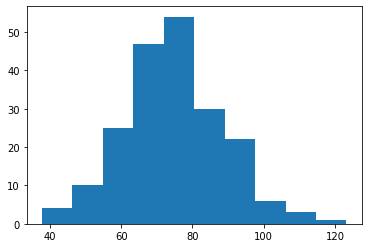

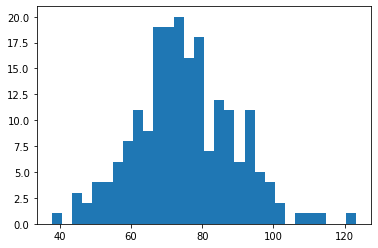

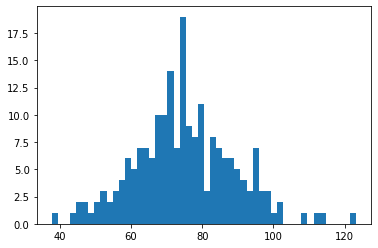

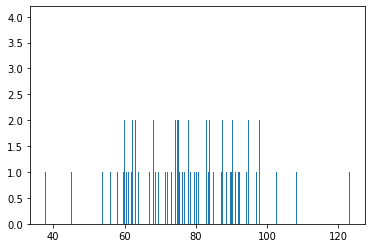

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

######### 練習１ ###########
data_dir ='./data/'
# height_weight.csvを読み込み
HW_data = pd.read_csv(data_dir + "height_weight.csv")

# 体重のヒストグラムを表示
plt.hist(HW_data['Wt'])
plt.show()

# bin数を30に設定
plt.hist(HW_data['Wt'], bins=30)
plt.show()

# bin数を50に設定
plt.hist(HW_data['Wt'], bins=50)
plt.show()

# bin数を1000に設定
plt.hist(HW_data['Wt'], bins=1000)
plt.show()

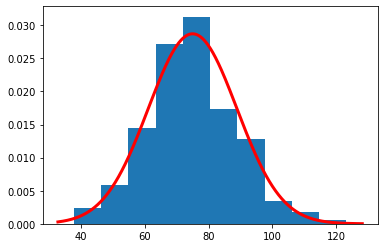

In [9]:
######### 練習２ ###########
HW_data = pd.read_csv(data_dir + "height_weight.csv")
Wt_mu = np.mean(HW_data['Wt']) # 平均
Wt_var = np.var(HW_data['Wt']) # 分散：標準偏差の二乗
Wt_std = np.std(HW_data['Wt']) # 標準偏差

from scipy.stats import norm
# 体重のヒストグラムを表示 (density=Trueで正規化)
plt.hist(HW_data['Wt'], density=True)
# 横軸の最小値
a = np.min(HW_data['Wt'])-5  # -5は正規分布の裾を表示するため
# 横軸の最大値
b = np.max(HW_data['Wt'])+5  # +5は正規分布の裾を表示するため
# aからbまで0.01刻みの数字が入った配列
x = np.arange(a,b,0.01)
# 平均(loc)がWt_mu，標準偏差(scale)がWt_stdの正規分布を生成
y = norm.pdf(x,loc=Wt_mu,scale=Wt_std)
# 正規分布を表示
plt.plot(x,y,lw=3,color="r")  # lw：線の太さ

0.0027365969174211586
0.03243311391003242


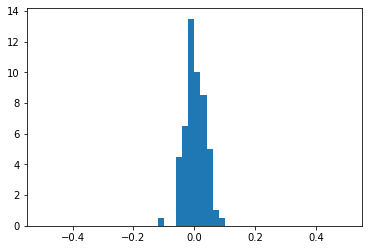

In [11]:
######### 練習３ ###########
import random

N = 1000 # 1回の標本中のサンプリング数 変えてみよう！
K = 100 # 標本回数 変えてみよう！

mu = 0 # 平均
sigma = 1 # 標準偏差（分散の平方根）
meanList = [] # 標本平均を保存するリストを初期化

for j in range(K): # 標本取得をK回繰り返す
    samples = [] # サンプルのリスト
    for i in range(N): # N個の標本をサンプリング
        a = random.gauss(mu,sigma)# 正規分布に従ったランダムサンプリング
        samples.append(a)
    sample_mean = np.mean(samples) # 標本平均の計算
    meanList.append(sample_mean) # 標本平均をリストに保存
    
# ヒストグラムで標本平均の分布を正規化して表示
plt.hist(meanList,range=[-0.5,0.5], bins=50, density=True)
mu = np.mean(meanList)
std = np.std(meanList)
print(mu)
print(std)

In [12]:
######### 練習４ ###########
from scipy import stats

# data読み込み
Grade_data=pd.read_csv(data_dir + "grade_data1.csv",sep=",")

# Mathematicsの平均と標準偏差を求める
mu = np.mean(Grade_data['Mathematics'])
sigma = np.std(Grade_data['Mathematics'])
print(mu)
print(sigma)

# 母平均の95%信頼区間の推定
alpha = 0.95 # 信頼係数95%
n = len(Grade_data['Mathematics']) # sample数
t = stats.t.ppf(1-(1-alpha)/2, n-1) # t分布を用いて確率変数tを計算
t_min = mu - t * sigma / np.sqrt(n-1) # 下限
t_max = mu + t * sigma / np.sqrt(n-1) # 上限
print(u"信頼区間の下限:",t_min)
print(u"信頼区間の上限:",t_max)

71.7
14.913416778190035
信頼区間の下限: 60.45450247142524
信頼区間の上限: 82.94549752857476


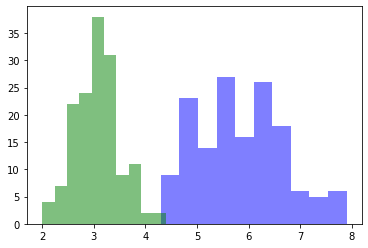

36.548157693982006
1.3503535965078185e-96


In [13]:
######### 練習５ ###########
# iris data 読み込み
iris=pd.read_csv(data_dir + 'iris_2metrics1.csv')

# 可視化 : histgram
plt.hist(iris['sepal-length'], color='blue', alpha=0.5)
plt.hist(iris['sepal-width'], color='green', alpha=0.5)
plt.show()

# 対応なしt検定
from scipy import stats

t, p = stats.ttest_ind(iris['sepal-length'], 
                       iris['sepal-width'], 
                       equal_var=False)
print(t)
print(p)

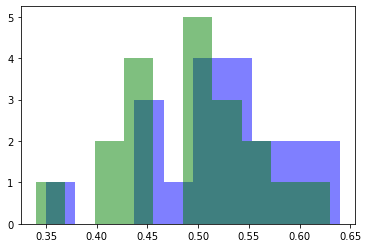

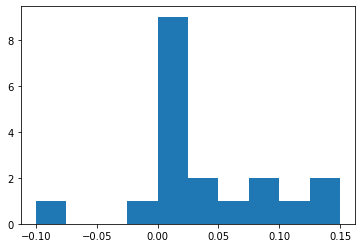

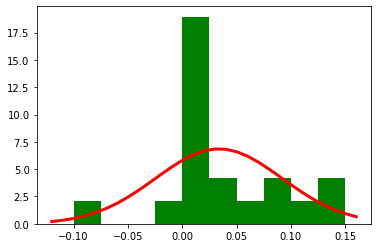

2.457703815601802
0.024352597586836344


In [22]:
######### 練習６ ###########
# アメリカの都市ごとの女性の労働率の平均の差に対する検定
# data読み込み
laborfor=pd.read_csv(data_dir + 'laborfor.csv')

# 可視化 : histgram
plt.hist(laborfor['1972'], color='blue', alpha=0.5)
plt.hist(laborfor['1968'], color='green', alpha=0.5)
plt.show()
plt.hist(laborfor['1972']-laborfor['1968'])
plt.show()

# 平均と分散を計算
mu = np.mean(laborfor['1972']-laborfor['1968'])
var = np.var(laborfor['1972']-laborfor['1968'])
# 正規化ヒストグラムを表示 (binの度数の総和が1になるわけではないことに注意)
plt.hist(laborfor['1972']-laborfor['1968'], color='green', density=True)
# -0.12から0.16まで0.01刻みの数字が入った配列
x = np.arange(-0.12,0.16,0.01)
plt.plot(x,stats.norm.pdf(x,loc=mu,scale=np.sqrt(var)),
         lw=3,color="r")
plt.show()

# 対応あり t検定
t, p = stats.ttest_rel(laborfor['1972'], laborfor['1968'])
print(t)
print(p)